# Raster Data Analysis in Python

*February 20, 2024*

**Jumpstart Comprehension Check**

We are working with a dataset on forest biomass. Tree growth increments (mm year-1) are measured at different forest sites, over time. The data are stored in a 3-dimensional array, `data`, defined by three axes:

- **First axis:** Annual time step, from 0 = First year to N = Last year
- **Second axis:** Monthly time step, from 0 = January to 11 = December
- **Third axis:** Site index, from 0 = First site to M = Last site

**We want to calculate the average growth increment in July for each site (averaging across the years).** Which line(s) of Python code will give us the right result?

1. `data.mean(axis = 0)`
2. `data[:,6].mean(axis = 0)`
3. `data[:,7].mean()`
4. `data.mean(axis = 0)[7]`
5. `data.mean(axis = 0)[6]`

---

## The Geospatial Data Abstraction Library (GDAL)

In [11]:
# Storing a list in a list is possible
numbers = [6, 7, 8]

[1, 2, 3, numbers]

[1, 2, 3, [6, 7, 8]]

In [12]:
# OR, you can 'flatten' the list to become part of another list using the * operator!

[1, 2, 3, *numbers]

[1, 2, 3, 6, 7, 8]

In [16]:
def greeting(*people):
    for person in people:
        print (f'Hello there, {person}!')

greeting('Marc')

Hello there, Marc!


In [22]:
# The * function packs or unpacks a sequence
greeting('Shiva', 'Fatima', 'Jacob')

Hello there, Shiva!
Hello there, Fatima!
Hello there, Jacob!


In [18]:
peeps = ['Fashad', 'Abraham']

greeting(peeps)

Hello there, ['Fashad', 'Abraham']!


In [20]:
# Here, the * unpacks
greeting(*peeps)

Hello there, Fashad!
Hello there, Abraham!


In [25]:
# Unpacking elements in a list, they become arguments to the function

nums = [5, 2]

pow(*nums) # Specifying raising 5 to the power of 2

25

In [28]:
def greeting2(*people, punc = '!'):
    for person in people:
        print (f'Hello there, {person}{punc}')

greeting2('Marc', '?')

Hello there, Marc!
Hello there, ?!


In [29]:
greeting2('Marc', punc = '?')

Hello there, Marc?


In [37]:
import numpy as np

arr = np.array([1, np.nan, 3]) # Creating an array

In [36]:
np.isnan(arr) # Return a list of T/F for every element of the array

array([False,  True, False])

In [34]:
np.isnan(arr).all() # Are all == NaN ?

False

In [35]:
np.isnan(arr).any() # Are any == NaN ?

True

In [38]:
arr_inverted = ~np.isnan(arr) # Invert the values of the array
arr_inverted

array([ True, False,  True])

In [1]:
from osgeo import gdal

In [6]:
from osgeo import gdal

# Use /vsicurl/ to access remote files
url = '/vsicurl/http://files.ntsg.umt.edu/data/GIS_Programming/data/NEON_albedo.tif'
ds = gdal.Open(url)

if ds is None:
    print("Failed to open the dataset.")
else:
    print("Raster count:", ds.RasterCount)

Raster count: 1


In [2]:
ds = gdal.Open('http://files.ntsg.umt.edu/data/GIS_Programming/data/NEON_albedo.tif')
ds

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\osgeo\gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [7]:
# Commands in GDAL have capitalized letters at the beginning of each word
ds.RasterCount

1

In [8]:
ds.GetProjection()

'PROJCS["WGS 84 / UTM zone 6N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-147],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32606"]]'

In [9]:
srs = ds.GetSpatialRef()
print(srs.ExportToPrettyWkt())

PROJCS["WGS 84 / UTM zone 6N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",-147],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32606"]]


In [17]:
# NEED TO KNOW IN ORDER TO PLACE THE RASTER CORRECTLY AND KNOW THEIR LOCATION

# Dimensions
# Point of origin - how far along X and Y a pixel is
# Upper left corner pixel - spatial coordinates (2 numbers, X and Y)
# Orientation: labeled X and Y values of pixels, and which way should be north (2 numbers, rotate in two directions)
# Pixel size: in order to know the location of a pixel with reference to pixel with known location (2 numbers, length and height)

# Where to find these numbers? See cell below!

In [19]:
# Affine transform

#============================================================================#
### (x_min, pixel_width, row_rotation, y_max, col_rotation, -pixel_height) ###
#============================================================================#

# These are the six numbers I need to put a raster on a map

# Here is the code to make sure I have that!
gt = ds.GetGeoTransform()
gt

(470000.0, 1.0, 0.0, 7228000.0, 0.0, -1.0)

### Defining the Spatial Reference System in Python

An **affine transformation** is a kind of transformation that preserves lines and paralellism; in GIS, it's a way of mapping one 2D grid onto a different gridded coordinate system.

![](affine-transformation.jpg)

*Image from [GeeksForGeeks.org](https://www.geeksforgeeks.org/python-opencv-affine-traansformation/)*

For example, an affine transformation describes the change in perspective between a billboard seen at an angle and the original image.

![](affine-transformation2.png)

*Image from [Felipe Meganha](https://felipemeganha.medium.com/perspective-transformation-with-kornia-8bf86718adfd)*

In [21]:
# The image coordinate system starts at the top left
# SRS starts at bottom left
# THIS IS WHY `pixel_height` IS NEGATIVE IN AFFINE TRANSFORMATION!
# Affine transformation is known as a 'GeoTransform' in GDAL

![](coordinate-system-diagram.png)

In [24]:
from affine import Affine

# Convert GeoTransform to an affine representation

transform = Affine.from_gdal(*gt)
# (pixel_width, row_rotation, x_min, 
#  col_rotation, -pixel_height, y_max)
transform

Affine(1.0, 0.0, 470000.0,
       0.0, -1.0, 7228000.0)

In [23]:
# (x_min, pixel_width, row_rotation, y_max, col_rotation, -pixel_height)
gt

(470000.0, 1.0, 0.0, 7228000.0, 0.0, -1.0)

In [51]:
# Multiply transform by (Width, Height) in pixels to get bottom right corner
transform * (1000, 1000) # Returns the SPATIAL coordinate of the pixel

(471000.0, 7227000.0)

In [26]:
470000.0 + (1000 * 1)

471000.0

In [27]:
7228000.0 - (1000 * 1) # Because of the difference in origin of coordinate systems

7227000.0

In [52]:
# Inverse transform because we want to go from spatial to image instead of reverse
~transform * (471000.0, 7227000.0) # Returns the IMAGE coordinate of the spatial reference

(1000.0, 1000.0)

---

## Working with Raster Data in Python

In [30]:
# Read the data in as a numpy array
arr = ds.ReadAsArray()
arr

array([[0.0605, 0.0765, 0.0905, ..., 0.0493, 0.0716, 0.1397],
       [0.0921, 0.1098, 0.1107, ..., 0.0477, 0.057 , 0.1121],
       [0.0672, 0.0707, 0.0723, ..., 0.0481, 0.082 , 0.1542],
       ...,
       [0.0977, 0.0876, 0.0691, ..., 0.0403, 0.052 , 0.0766],
       [0.11  , 0.1162, 0.0958, ..., 0.0848, 0.087 , 0.0796],
       [0.065 , 0.0865, 0.0874, ..., 0.0844, 0.0713, 0.0595]],
      dtype=float32)

In [31]:
arr.shape

(1000, 1000)

In [32]:
arr.shape == (ds.RasterYSize, ds.RasterXSize)

True

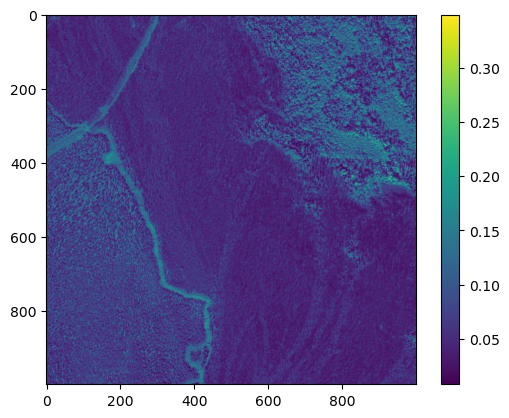

In [35]:
import matplotlib.pyplot as plt
plt.imshow(arr)
plt.colorbar() #Shown on this scale because it's plt's default choice

In [37]:
# How do we get the NW corner of the image?
arr[0,0] # This will print the pixel value that translare to the plotted image.

0.0605

---

## Multispectral Raster Data and Spectral Indices

In [42]:
ds = gdal.Open('/vsicurl/http://files.ntsg.umt.edu/data/GIS_Programming/data/NEON_ortho.tif')

In [44]:
rgb = ds.ReadAsArray()
rgb.shape

(3, 1000, 1000)

In [46]:
import numpy as np
rgb2 = np.rollaxis(rgb, 0, 3)
rgb2.shape

(1000, 1000, 3)

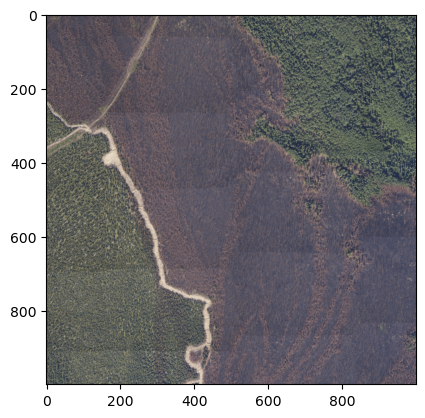

In [49]:
plt.imshow(rgb2)

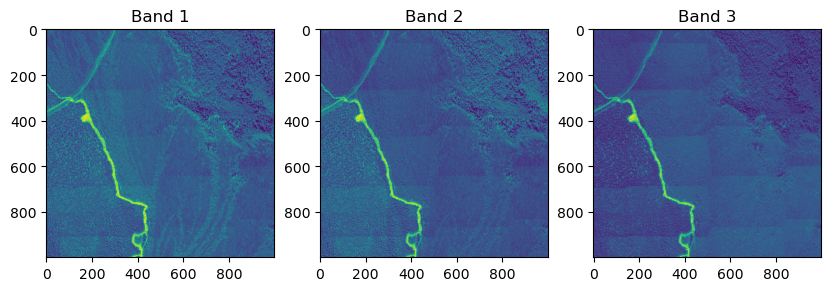

In [47]:
fig = plt.figure(figsize = (10, 8))
fig.subplots_adjust(wspace = 0.2) # More horizontal space between plots
for band in range(0, ds.RasterCount):
    # add_subplot(nrows, ncols, index, ...); index must be non-zero so we add 1
    ax = fig.add_subplot(1, 3, 1 + band, title = f'Band {band+1}')
    ax.imshow(rgb[band])

---

### Challenge: Python Raster Calculator

The Normalized Difference Greenness Index (Escadafal & Huete 1991) or NDGI is a variation on the Normalized Difference Vegetation Index (NDVI). It can be calculated when only visible bands (e.g., red, green, blue) are available:

$$
\text{NDGI} = \frac{G - R}{G + R}
$$

Where $R$ is the Red band value and $G$ is the Green band value.

**Calculate the NDGI using this multi-band raster and then plot the resulting image.** The bands of this NEON dataset are, in order: Red, Green, Blue.

**NOTE:** Because the above calculation involves a fraction and will return floating-point data, we should first convert our array to a floating-point data type:

In [ ]:
rgb = rgb.astype(np.float32)

---

## More Resources

- GIS&T Body of Knowledge: [Python for GIS](https://gistbok.ucgis.org/bok-topics/python-gis)
- GIS&T Body of Knowledge: [GDAL/OGR and Geospatial Data IO Libraries](https://gistbok.ucgis.org/bok-topics/gdalogr-and-geospatial-data-io-libraries)